Anzahl der verkauften Autos: 46405
Zeitraum: 2011 bis 2021
Anzahl der Marken: 77
Marken: ['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Lada' 'Mitsubishi'
 'Others' 'Lexus' 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru'
 'Dodge' 'Microcar' 'Lamborghini' 'Baic' 'Tesla' 'Chrysler' '9ff'
 'McLaren' 'Aston' 'Rolls-Royce' 'Alpine' 'Lancia' 'Abarth' 'DS'
 'Daihatsu' 'Ligier' 'Ferrari' 'Caravans-Wohnm' 'Aixam' 'Piaggio' 'Zhidou'
 'Morgan' 'Maybach' 'Tazzari' 'Trucks-Lkw' 'RAM' 'Iveco' 'DAF' 'Alpina'
 'Polestar' 'Brilliance' 'FISKER' 'Cadillac' 'Trailer-Anhänger' 'Isuzu'
 'Corvette' 'DFSK' 'Estrima']


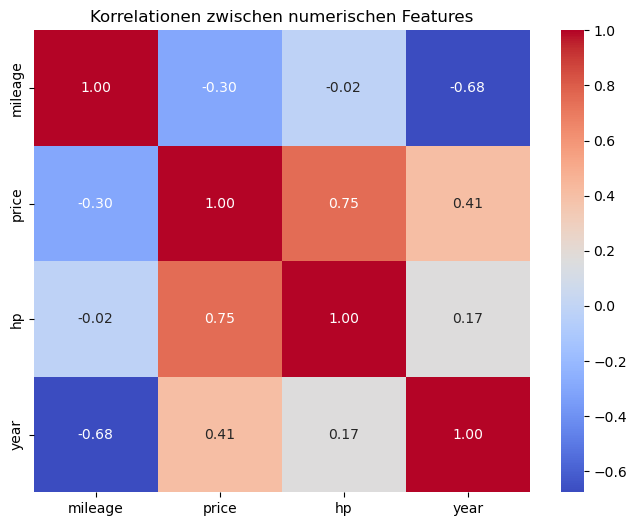

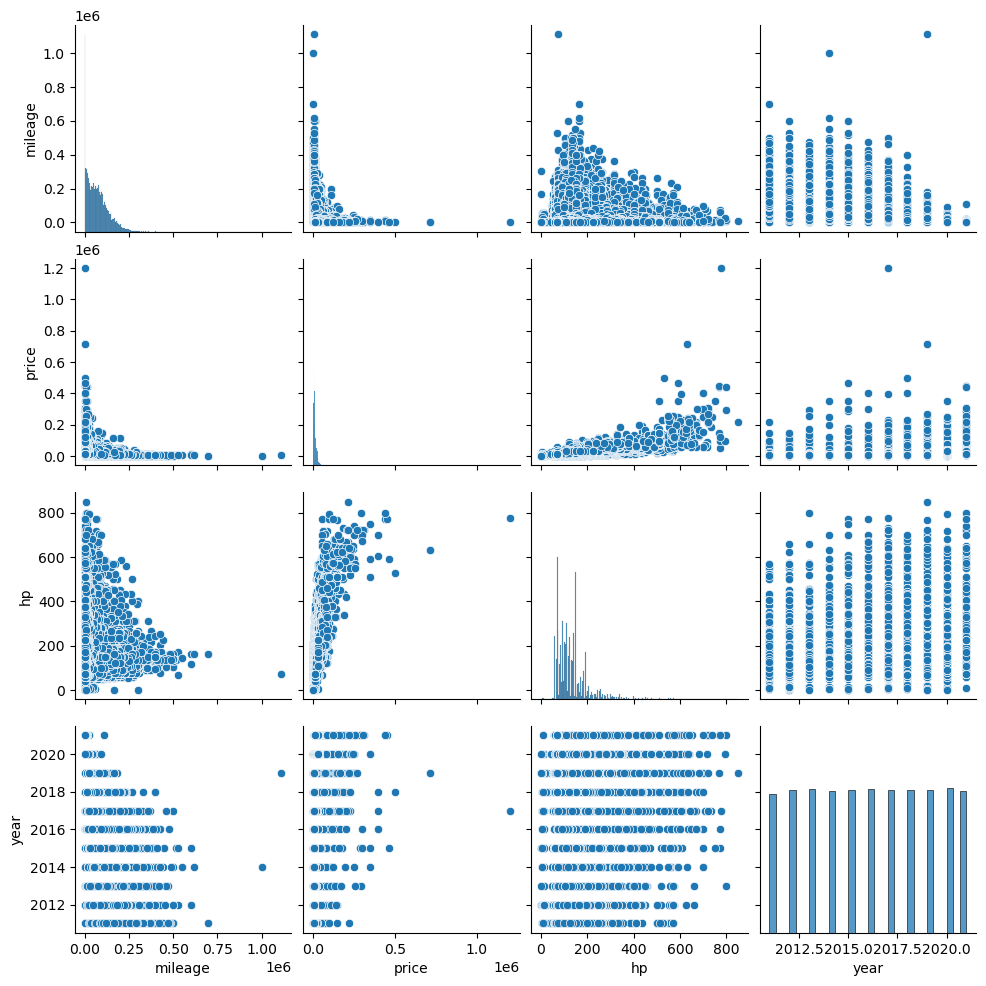

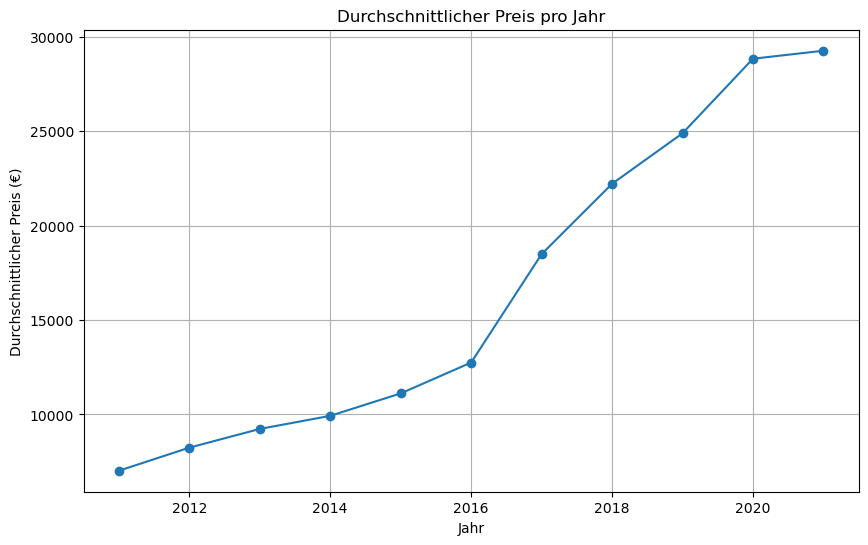

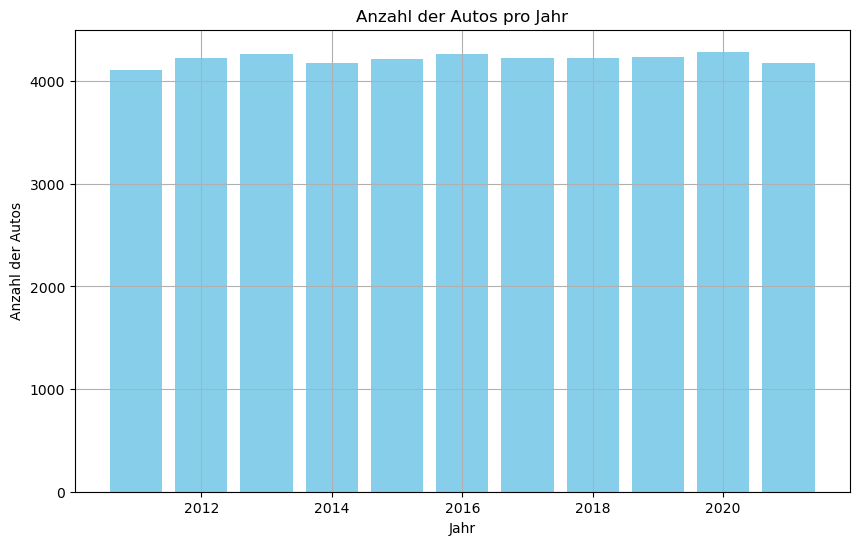

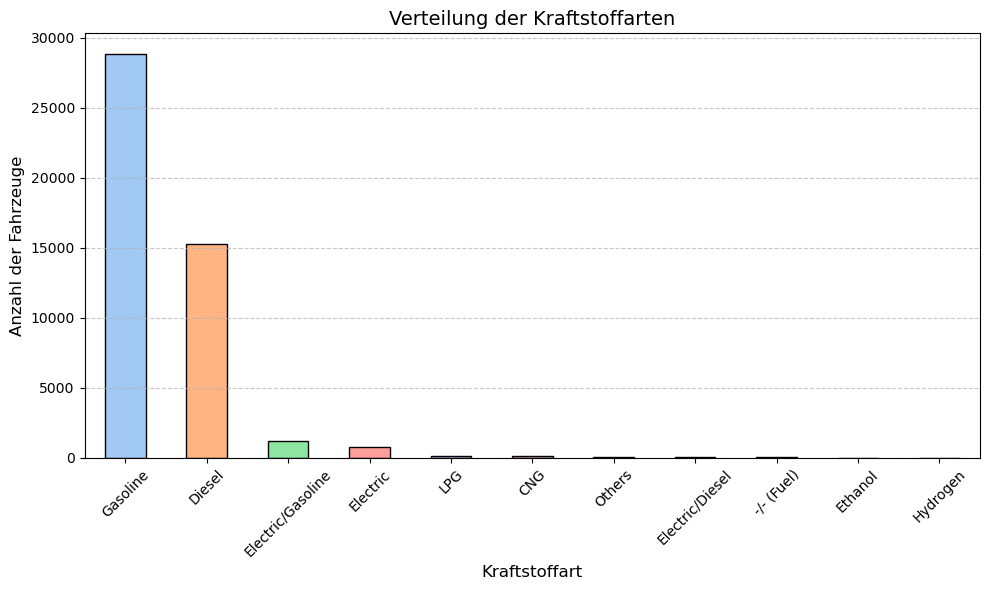

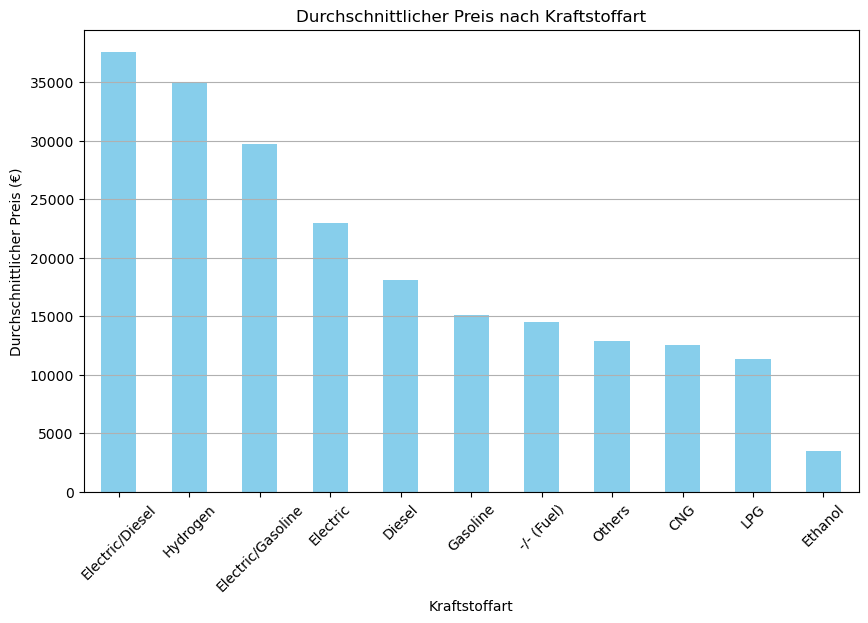

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datei einlesen
file_path = r"G:\Meine Ablage\Data Science\7_Karrierecoaching\Case Study\autoscout24.csv"

autos_data = pd.read_csv(file_path)

# 1. Wie viele Autos wurden verkauft? Über welchen Zeitraum?
anzahl_autos = len(autos_data)
zeitraum = (autos_data['year'].min(), autos_data['year'].max())
print(f"Anzahl der verkauften Autos: {anzahl_autos}")
print(f"Zeitraum: {zeitraum[0]} bis {zeitraum[1]}")

# 2. Welche Marken sind erfasst?
marken = autos_data['make'].unique()
anzahl_marken = len(marken)
print(f"Anzahl der Marken: {anzahl_marken}")
print("Marken:", marken)

# 3. Existieren Korrelationen zwischen den (numerischen) Features? (Scatterplots)
numerical_columns = ['mileage', 'price', 'hp', 'year']
correlation_matrix = autos_data[numerical_columns].corr()

# Heatmap der Korrelationen
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationen zwischen numerischen Features")
plt.show()

# Scatterplots für ausgewählte numerische Features
sns.pairplot(autos_data[numerical_columns])
plt.show()

# 4. Gibt es Veränderungen über die Jahre?
# Durchschnittlicher Preis und Anzahl der Autos pro Jahr
autos_by_year = autos_data.groupby('year').agg({'price': 'mean', 'mileage': 'mean', 'year': 'count'}).rename(columns={'year': 'count'})
autos_by_year.reset_index(inplace=True)

# Durchschnittlicher Preis über die Jahre
plt.figure(figsize=(10, 6))
plt.plot(autos_by_year['year'], autos_by_year['price'], marker='o')
plt.title('Durchschnittlicher Preis pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittlicher Preis (€)')
plt.grid()
plt.show()

# Anzahl der Autos über die Jahre
plt.figure(figsize=(10, 6))
plt.bar(autos_by_year['year'], autos_by_year['count'], color='skyblue')
plt.title('Anzahl der Autos pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Autos')
plt.grid()
plt.show()

# Verteilung der Kraftstoffarten
fuel_verteilung = autos_data['fuel'].value_counts()

# Balkendiagramm der Kraftstoffarten
plt.figure(figsize=(10, 6))
fuel_verteilung.plot(
    kind='bar',
    color=sns.color_palette('pastel', len(fuel_verteilung)),
    edgecolor='black'
)

# Titel und Achsenbeschriftungen
plt.title("Verteilung der Kraftstoffarten", fontsize=14)
plt.xlabel("Kraftstoffart", fontsize=12)
plt.ylabel("Anzahl der Fahrzeuge", fontsize=12)

# Gitter und Anpassung der Achsenticks
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot anzeigen
plt.tight_layout()
plt.show()



# Einfluss der Kraftstoffarten auf den Preis
fuel_price_influence = autos_data.groupby('fuel')['price'].mean().sort_values(ascending=False)

# Visualisieren
plt.figure(figsize=(10, 6))
fuel_price_influence.plot(kind='bar', color='skyblue')
plt.title("Durchschnittlicher Preis nach Kraftstoffart")
plt.xlabel("Kraftstoffart")
plt.ylabel("Durchschnittlicher Preis (€)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
